![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Zadaci

Cao svima.

Uradila sam vecinu stvari. Nesto ne mogu bas precizno, treba mi vise vremena da skontam gde je bug, ili pomoc. Ja bih radje ovo drugo, posto mi se cini da su "greske" takve da vi sa iskustvom mozete lako da ih ispravite, a ja ne znam sad tacno ni gde da trazim odgovore. Mislim da je gubljenje vremena da potrosim nedelju dana na to. Bolje da udjem u neki real problem. 

U poslednjem zadatku, tj. dodatnom problemu nije bas jasno sta se trazi. Mozda mozemo zajedno da to diskutujemo.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import pandas as pd
#import numpy
#uvozim librarise kako mi trebaju, za pocetak samo pandu

In [2]:
df = pd.read_csv('descriptive_attributes.csv')
df.head()

,movieID,titleType,primaryTitle,originalTitle,genres
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History"
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama"
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama


In [3]:
df1 = pd.read_csv('numeric_atributes.csv')
df1.head()
#Imam DtypeWarning: ne osvrcem se previse na ovakve probleme, mozda bi trebalo?

/Users/buba/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,movieID,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
0,tt0034371,0,1941,\N,58,4.7,29.0,False
1,tt0148665,0,1941,\N,7,6.5,16.0,False
2,tt1032841,0,2006,\N,60,3.8,6.0,False
3,tt1495820,0,1998,\N,10,5.6,8.0,False
4,tt0115768,0,1996,\N,90,6.3,25.0,False


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


1. Spojiti tabele descriptive_attributes.csv i numeric_atributes.csv . U obe tabele je dostupna kolona movieID i spojiti redove po toj koloni. Redove koji nemaju par u drugoj tabeli odbaciti

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [4]:
df = df.join(df1.set_index('movieID'), on='movieID')
df.head()

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History",0.0,1979.0,1979,60.0,8.5,952.0,False
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama",0.0,1993.0,\N,163.0,7.8,790.0,False
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western,0.0,1941.0,\N,57.0,5.9,34.0,False
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0.0,2017.0,\N,28.0,5.4,177.0,False
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0.0,2009.0,\N,60.0,5.7,15.0,False


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

2. Prebrojati redove u kojima nije popunjena vrednost kolone isGood

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466281 entries, 0 to 466280
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movieID         466281 non-null  object 
 1   titleType       466281 non-null  object 
 2   primaryTitle    466281 non-null  object 
 3   originalTitle   466281 non-null  object 
 4   genres          436281 non-null  object 
 5   isAdult         438697 non-null  float64
 6   startYear       438697 non-null  float64
 7   endYear         438697 non-null  object 
 8   runtimeMinutes  438697 non-null  float64
 9   averageRating   438257 non-null  float64
 10  numVotes        438697 non-null  float64
 11  isGood          411082 non-null  object 
dtypes: float64(5), object(7)
memory usage: 42.7+ MB


In [6]:
466281 - 411082

55199

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

3. Popuniti nedostajuće vrednosti u koloni prosečne ocene



In [7]:
df.averageRating.isnull().value_counts()

False    438257
True      28024
Name: averageRating, dtype: int64

In [8]:
#Imamo 28024 missing vallues 
df['averageRating'][30]

nan

In [9]:
#mean 
mask = df.averageRating.notnull()
mean = df[mask]['averageRating'].mean()
med = df[mask]['averageRating'].median()
print(mean)
print(med)

6.4556737256909615
6.6


In [10]:
#kad ga prvi put runujem javlja warning, a kad ga drugi put runujem, sve ok. hm, zasto?
for i in range(len(df)):
    #print(i, df['averageRating'][i])
    if (str(df['averageRating'][i]) == 'nan'):
        df['averageRating'][i] = med # or  df['averageRating'][i] = mean, or somthing else
        
df.averageRating.isnull().value_counts()
# print(i, df['averageRating'][i])

/var/folders/yb/wss347wn1fv6qz26wgcc2pnc0000gn/T/ipykernel_64186/542639945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['averageRating'][i] = med # or  df['averageRating'][i] = mean, or somthing else


False    466281
Name: averageRating, dtype: int64

In [11]:
#Nemamo vise missing vallues
df['averageRating'][30]

6.6

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

4. Izdvojiti i ispisati redove u kojima je godina početka emitovanja iznad 2000 i prosečna ocena gledalaca iznad 3. Prebrojati broj redova.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [12]:
mask = (df['startYear'] > 2000) & (df['averageRating'] > 3)
newNotSoBad = df[mask]
newNotSoBad

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0.0,2017.0,\N,28.0,5.4,177.0,False
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0.0,2009.0,\N,60.0,5.7,15.0,False
6,tt0412225,tvSeries,The Rise of the Celebrity Class,The Rise of the Celebrity Class,Documentary,0.0,2004.0,\N,200.0,6.8,20.0,False
8,tt13286468,tvSeries,I tourta tis mamas,I tourta tis mamas,Comedy,0.0,2020.0,\N,60.0,8.2,182.0,False
10,tt13550066,movie,10 Steps to Love,10 Steps to Love,Romance,0.0,2021.0,\N,90.0,7.7,19.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
466274,tt2207435,short,Anticyclone,Anticyclone,NaN,0.0,2011.0,\N,9.0,6.5,13.0,NaN
466276,tt1288649,tvMovie,Un homme d'honneur,Un homme d'honneur,NaN,0.0,2009.0,\N,95.0,7.1,38.0,False
466277,tt1446672,movie,A Kiss for Jed,A Kiss for Jed Wood,NaN,0.0,2011.0,\N,86.0,6.9,74.0,False
466278,tt0388936,tvMovie,Fathers and Sons,Fathers and Sons,NaN,0.0,2005.0,\N,101.0,6.0,400.0,True


In [13]:
#vidim broj redova gore iznad (267543 rows) a mogu i ovako:
len(newNotSoBad) 

267833

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

5. Iscrtati histogram vrednosti za prosečnu ocenu elemenata tabele. Uzeti 10 polja u grafiku.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

 Ne razumem sta znaci: "Uzeti 10 polja u grafiku." a nije jasno ni "vrednosti za prosečnu ocenu elemenata tabele".
 Crtam prosto histogram...
 
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png) 

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

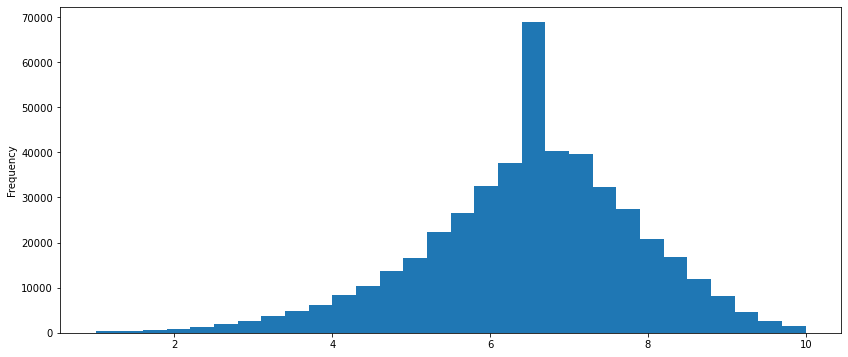

In [15]:
df['averageRating'].plot(kind='hist', bins=30, figsize=(14,6))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

6. Izračunati i ispisati prosečnu vrednost ocene za svaku kategoriju videa (movie, short,tvMiniSeries...)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [16]:
titleType = df['titleType'].unique()
titleType

array(['tvSeries', 'movie', 'tvMovie', 'video', 'tvShort', 'short',
       'tvSpecial', 'tvMiniSeries', 'videoGame'], dtype=object)

In [17]:
for i in titleType:
    print(i)
    mask = (df['titleType'] == i)
    print(df[mask]['averageRating'].mean())

tvSeries
6.802368270877065
movie
6.170036391630652
tvMovie
6.579915360251518
video
6.507923547968253
tvShort
6.857588856868412
short
6.8093856625724865
tvSpecial
6.853758911211885
tvMiniSeries
7.0782202691567555
videoGame
6.724000000000002


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

7. Dodati u tablu kolonu “similarity” u kojoj će biti upisana numerička sličnost naslova filma sa naslovom “The French Connection”. 
Izdvojiti 10 redova sa najvišom vrednošću.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Ovo je jedan od nacina. Imam primer i za drugacije resenje, ali mi ne radi dobro, nesto mi brka reci, tako da ga nisam stavila. Bilo bi zanimljivo diskutovati zasto ne radi. A i sa ovim metodom imam problem... see below.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [18]:
df[df['primaryTitle'] == 'The French Connection']

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood
455782,tt0067116,movie,The French Connection,The French Connection,NaN,0.0,1971.0,\N,104.0,7.7,121516.0,False


In [19]:
#pripremicemo kolonu u koju cemo ubaciti vrednosti za slicnost filma sa "The French connection"

df['similarity'] = 0
df.head()

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History",0.0,1979.0,1979,60.0,8.5,952.0,False,0
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama",0.0,1993.0,\N,163.0,7.8,790.0,False,0
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western,0.0,1941.0,\N,57.0,5.9,34.0,False,0
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0.0,2017.0,\N,28.0,5.4,177.0,False,0
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0.0,2009.0,\N,60.0,5.7,15.0,False,0


ovo u nastavku traje predugo. why? sta mi ne valja? 
valja ali ima puno rows, za range(5) ili range(10000) radi sta hocu... zasto je tako spor? zapravo, ne mogu da dodcekam koliko je spor. Ili negde zapinje...

Takodje mi javlja isti warning kao gore u zadatku 3. warning SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame,
Ali to je ok, ne moram da radim sa kopijom. Kada koristim .loc ne javlja tu gresku

Ali je predugo, to ne znam kako da resim. 

Za sada radim sa range(10000) (vec to je solidno sporo) a razmisljacu kako da ga popravim.


In [22]:
#df1 = df.copy()
#df1.loc[i,'similarity'] = sim

#for i in range(len(df)):
for i in range(10000):
    sim = 0.5
    df.loc[i,'similarity'] = sim # ili df['similarity'][i]=sim (za ovo javlja gresku)
    
df.head()

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History",0.0,1979.0,1979,60.0,8.5,952.0,False,0.5
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama",0.0,1993.0,\N,163.0,7.8,790.0,False,0.5
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western,0.0,1941.0,\N,57.0,5.9,34.0,False,0.5
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0.0,2017.0,\N,28.0,5.4,177.0,False,0.5
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0.0,2009.0,\N,60.0,5.7,15.0,False,0.5


In [23]:
#!pip install spacy
#!python -m spacy download en

import en_core_web_sm

nlp = en_core_web_sm.load()


In [24]:
#cosine similarity (sporo, sigurno mu treba vise od 1 minut da izbaci resenje)

doc2 = nlp('The French Connection')
#for i in range(len(df)):
for i in range(10000):
    doc1 = nlp(df['primaryTitle'][i])
    sim = doc1.similarity(doc2)
    df.loc[i,'similarity'] = sim
    
df.head()

/var/folders/yb/wss347wn1fv6qz26wgcc2pnc0000gn/T/ipykernel_64186/4070610310.py:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  sim = doc1.similarity(doc2)


,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History",0.0,1979.0,1979,60.0,8.5,952.0,False,0.495032
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama",0.0,1993.0,\N,163.0,7.8,790.0,False,0.407190
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western,0.0,1941.0,\N,57.0,5.9,34.0,False,0.686142
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0.0,2017.0,\N,28.0,5.4,177.0,False,0.534774
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0.0,2009.0,\N,60.0,5.7,15.0,False,0.466685


In [25]:
#sort
df1 = df.sort_values(by=['similarity'], ascending=False)
df1.head(10)
    

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
8731,tt0023980,movie,The Eleventh Commandment,The Eleventh Commandment,Drama,0.0,1933.0,\N,68.0,6.0,49.0,False,0.925932
5489,tt11273780,movie,The American Dream,Giac Mo My,"Drama,Romance",0.0,2017.0,\N,103.0,4.6,5.0,False,0.904601
1091,tt0467598,movie,The Brutal River,Khoht phetchakhaat,"Action,Adventure,Drama",0.0,2005.0,\N,87.0,4.3,121.0,False,0.903698
8441,tt0058191,movie,The Mysterious Magician,Der Hexer,"Crime,Mystery",0.0,1964.0,\N,95.0,6.6,1459.0,False,0.898152
9963,tt0048331,movie,The Magnificent Matador,The Magnificent Matador,"Drama,Romance",0.0,1955.0,\N,94.0,5.6,214.0,False,0.896006
2401,tt0043350,movie,The Blue Veil,The Blue Veil,Drama,0.0,1951.0,\N,113.0,7.3,411.0,False,0.895334
6431,tt1528828,tvMovie,The Whole Truth,Tutta la verità,Drama,0.0,2009.0,\N,200.0,5.3,28.0,False,0.893266
9671,tt1730155,movie,The Main Chance,The Main Chance,Drama,0.0,1964.0,\N,61.0,5.7,57.0,NaN,0.891983
6650,tt4800364,short,The Egyptian Pyramids,Les Pyramides d'Égypte,"Animation,Comedy,Short",0.0,2013.0,\N,4.0,6.2,111.0,False,0.891625
7107,tt0035014,short,The Magnetic Telescope,The Magnetic Telescope,"Action,Adventure,Animation",0.0,1942.0,\N,8.0,7.0,836.0,False,0.889988


In [27]:
#the Jaccard Similarity (takodje sporo)

doc2 = 'The French Connection'
doc2_tokens = set(doc2.lower().split())
#for i in range(len(df)):
for i in range(10000):
    doc1 = df['primaryTitle'][i]
    doc1_tokens = set(doc1.lower().split())
    
    # Calculate the Jaccard Similarity
    jaccard_similarity =  len(doc1_tokens.intersection(doc2_tokens))/len(doc1_tokens.union(doc2_tokens))

    df.loc[i,'similarity'] = jaccard_similarity
    
df.head()


,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
0,tt0078593,tvSeries,Danger UXB,Danger UXB,"Action,Drama,History",0.0,1979.0,1979,60.0,8.5,952.0,False,0.0
1,tt0237094,movie,Chenkol,Chenkol,"Action,Drama",0.0,1993.0,\N,163.0,7.8,790.0,False,0.0
2,tt0033559,movie,The Driftin' Kid,The Driftin' Kid,Western,0.0,1941.0,\N,57.0,5.9,34.0,False,0.2
3,tt6819788,tvSeries,Hospital People,Hospital People,Comedy,0.0,2017.0,\N,28.0,5.4,177.0,False,0.0
4,tt1555199,tvMovie,Lindsey's Way,Lindsey's Way,Drama,0.0,2009.0,\N,60.0,5.7,15.0,False,0.0


In [28]:
#sort
df1 = df.sort_values(by=['similarity'], ascending=False)
df1.head(10)

,movieID,titleType,primaryTitle,originalTitle,genres,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,isGood,similarity
8013,tt9826820,movie,The Connection,The Connection,Sci-Fi,0.0,2021.0,\N,86.0,3.2,111.0,False,0.666667
8063,tt1314237,movie,The French Kissers,Les beaux gosses,"Comedy,Drama,Romance",0.0,2009.0,\N,90.0,6.4,3903.0,True,0.500000
6474,tt0071509,movie,The Florida Connection,The Florida Connection,"Action,Drama,Thriller",0.0,1975.0,\N,106.0,4.3,25.0,False,0.500000
472,tt0023447,movie,Secrets of the French Police,Secrets of the French Police,Crime,0.0,1932.0,\N,58.0,5.8,284.0,False,0.333333
3890,tt0099399,movie,Delta Force 2: The Colombian Connection,Delta Force 2: The Colombian Connection,"Action,Adventure,Crime",0.0,1990.0,\N,111.0,4.8,7476.0,False,0.285714
7296,tt2501348,short,The Ladder,The Ladder,"Action,Adventure,Comedy",0.0,2013.0,\N,7.0,9.2,25.0,False,0.250000
8430,tt6492930,short,The Seam,The Seam,"Drama,Horror,Short",0.0,2017.0,\N,17.0,7.6,13.0,False,0.250000
2657,tt1505890,short,The Legend,Legenda,"Biography,Documentary,Short",0.0,2005.0,\N,30.0,5.1,11.0,False,0.250000
715,tt0803100,movie,The Crocodiles,Vorstadtkrokodile,"Adventure,Family",0.0,2009.0,\N,98.0,6.1,1327.0,True,0.250000
717,tt10370694,movie,The Brain,Cinq nouvelles du cerveau,Documentary,0.0,2021.0,\N,100.0,6.6,10.0,False,0.250000


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

8. Kreirati tabelu reci koje se pojavljuju u naslovima filmova, i broj njihovog pojavljivanja u celoj tabeli

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [29]:
import spacy
reci = []
#for i in range(len(df)):
for i in range(100):
    doc = df['primaryTitle'][i]
    doc1_tokens = set(doc.lower().split())
    for t in doc1_tokens:
     #   #print(t)
        reci.append(t)
tabela_reci = pd.DataFrame(reci, columns=['rec'] )
tabela_reci

,rec
0,danger
1,uxb
2,chenkol
3,driftin'
4,the
...,...
337,"monkeyshines,"
338,bastard
339,sick
340,gone


In [30]:
#brojanje
X = tabela_reci.value_counts()
X.head(20)

rec  
the      18
of       10
a         5
my        4
story     3
and       3
love      3
to        3
i         2
from      2
kids      2
du        2
black     2
2:        2
world     2
your      2
10        2
los       2
widow     2
paul      1
dtype: int64

Ovde sada ima finesa, treba recimo izbaciti stop words... zabavljacu se sa ovim zadatkom jos svakako...

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

9. Pozvati api get metodom sa adrese “https://api.coindesk.com/v1/bpi/currentprice.json”. Iz rezultata izvući za bpi, i usd vrednost rate_float

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


In [31]:
import requests
response = requests.get("https://api.coindesk.com/v1/bpi/currentprice.json")
response

<Response [200]>

In [32]:
print(response.json())

{'time': {'updated': 'Jul 11, 2022 11:47:00 UTC', 'updatedISO': '2022-07-11T11:47:00+00:00', 'updateduk': 'Jul 11, 2022 at 12:47 BST'}, 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org', 'chartName': 'Bitcoin', 'bpi': {'USD': {'code': 'USD', 'symbol': '&#36;', 'rate': '20,481.4668', 'description': 'United States Dollar', 'rate_float': 20481.4668}, 'GBP': {'code': 'GBP', 'symbol': '&pound;', 'rate': '17,114.1498', 'description': 'British Pound Sterling', 'rate_float': 17114.1498}, 'EUR': {'code': 'EUR', 'symbol': '&euro;', 'rate': '19,951.9389', 'description': 'Euro', 'rate_float': 19951.9389}}}


In [33]:
import json

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

jprint(response.json())

{
    "bpi": {
        "EUR": {
            "code": "EUR",
            "description": "Euro",
            "rate": "19,951.9389",
            "rate_float": 19951.9389,
            "symbol": "&euro;"
        },
        "GBP": {
            "code": "GBP",
            "description": "British Pound Sterling",
            "rate": "17,114.1498",
            "rate_float": 17114.1498,
            "symbol": "&pound;"
        },
        "USD": {
            "code": "USD",
            "description": "United States Dollar",
            "rate": "20,481.4668",
            "rate_float": 20481.4668,
            "symbol": "&#36;"
        }
    },
    "chartName": "Bitcoin",
    "disclaimer": "This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org",
    "time": {
        "updated": "Jul 11, 2022 11:47:00 UTC",
        "updatedISO": "2022-07-11T11:47:00+00:00",
        "updateduk": "Jul 11, 2022 at 12:47 B

In [34]:
X = response.json()
X

{'time': {'updated': 'Jul 11, 2022 11:47:00 UTC',
  'updatedISO': '2022-07-11T11:47:00+00:00',
  'updateduk': 'Jul 11, 2022 at 12:47 BST'},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org',
 'chartName': 'Bitcoin',
 'bpi': {'USD': {'code': 'USD',
   'symbol': '&#36;',
   'rate': '20,481.4668',
   'description': 'United States Dollar',
   'rate_float': 20481.4668},
  'GBP': {'code': 'GBP',
   'symbol': '&pound;',
   'rate': '17,114.1498',
   'description': 'British Pound Sterling',
   'rate_float': 17114.1498},
  'EUR': {'code': 'EUR',
   'symbol': '&euro;',
   'rate': '19,951.9389',
   'description': 'Euro',
   'rate_float': 19951.9389}}}

In [35]:
X['bpi']

{'USD': {'code': 'USD',
  'symbol': '&#36;',
  'rate': '20,481.4668',
  'description': 'United States Dollar',
  'rate_float': 20481.4668},
 'GBP': {'code': 'GBP',
  'symbol': '&pound;',
  'rate': '17,114.1498',
  'description': 'British Pound Sterling',
  'rate_float': 17114.1498},
 'EUR': {'code': 'EUR',
  'symbol': '&euro;',
  'rate': '19,951.9389',
  'description': 'Euro',
  'rate_float': 19951.9389}}

In [36]:
X['bpi']['USD']

{'code': 'USD',
 'symbol': '&#36;',
 'rate': '20,481.4668',
 'description': 'United States Dollar',
 'rate_float': 20481.4668}

In [37]:
X['bpi']['USD']['rate_float']

20481.4668

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Dodatno dati pisani predlog rešenja za sledeći problem:

Klijent je arhivirao prethodne pretrage korisnika njegove aplikacije. Od podataka su sačuvani ime korisnika,  njegove godine, datum pretrage, koji tekst je unet, koji predmet po redu je u okviru vracene liste kupio,  u koju kategoriju taj predmet spada, cena predmeta i stanje kredita korisnika u momentu kupovine.

Možete li da predložite neki metoda koji omogućio da predmet iz prave kategorije bude sortiran ranije na listi?

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [38]:
# Sta je "prava kategorija a sta je "ranije na listi", koliko ranije?" 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Pogledacu jos malo taj NLP i sta tu sve ima... to mi je novo a ima raznih stvari, treba malo bolje da udjem u pricu. Za sada, to je to.

Lep pozdrav,
Lj.
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)